# 3 Finite markov chains

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /Users/shuhu/anaconda3/lib/python3.7/site-packages (0.4.5)


## 3.1 Overview

Markov chains are one of the most useful classes of **stochastic processes** (?), being

1. simple, flexible and supported by many elegant theoretical results
2. valuable for building intuition about random dynamic models
3. Central to quantitative modeling in their own right

Here, we review some of the theory of Markov chains and also introduce some of the high-quality routines for working with Markov chains available in QuantEcon.py

Prerequisite knowledge: basic probability and linear algebra.

## 3.2 Definitions of Stochastic matrices and Markov Chain

### Def. (Stochatic (markov) matrices)

A stochastic matrix (or Markov matrix) is an $n \times n$ square matrix $P=(p_{i,j})$ such that

1. Each element of $P$ is nonnegative ($ p_{i,j} \geq 0$), and
2. each row of $P$ sums to 1, i.e., $p_{i,1} + p_{i,2} + \cdots + p_{i,n} = 1$ for $i \in \{ 1, …, n \}$.

#### Remarks

Each row of $P$, $p_{i,j} (j)$ can be regarded as a probability mass function over $n$ possible outcomes.

#### Proposition (To be checked (1))

If $P$ is a stochastic matrix, then the $k$-th power $P^k$ for all $k \in \N$ is also a stochastic matrix. 

### Def. (Markov Chains)

Let $S$ be a finite set with $n$ elements $\{ x_1, …, x_n\}$, where the set $S$ is called the state space and $x_1, …, x_n$ are the state values.

A **Markov chain** $\{ X_t \}$ on $S$ is a sequence of random variables on $S$ that have the **Markov property**: for any date $t$ and any state $y \in S$,
$$
\mathcal{P} \{ X_{t+1} = y | X_t \} = \mathcal{P} \{X_{t+1} = y | X_t, X_{t-1},...\}
$$
The dynamics of a Markov chain are fully determined by the set of values
$$
P(x,y)= \mathcal{P} \{ X_{t+1} = y | X_t =x \} \ (x, y \in S)
$$

#### Way 1: Construct a Stochastic matrix by using Markov Chains

By construction,

1. $P(x,y)$ is the probability of going from $x$ to $y$ in one unit of time (one step);
2. $P(x, \cdot)$ is the conditional distribution of $X_{t+1}$, given $X_t=x$.

We can view $P$ as a stochastic matrix, where $P_{i,j}=P(x_i, x_j)$  $1 \leq i,j \leq n$.

#### Way 2: Generate a Markov Chain by a Stochastic matrix $P$

Alternatively, if we take a stochastic matrix $P$, we can generate a Markov chain $\{ X_t \}$ as following:

1. Draw $X_0$ from some specified distribution;
2. for each $t=0,1,…$, draw $X_{t+1}$ from $P(X_t, \cdot)$.

By construction, the resulting process satisfies $(2)$.

#### Note

1. That is, Conditional probability of future state on current state equals the conditional probability of future state on current and all past states, or equivalently, knowing the current state is enough to know probabilities for future states.

### Example 1 Job seek model
### Example 2 Economic growth model


## 3.1 Simulation
One natural way to answer questions about Markov Chains is to simulate them(?). e.g., to approximate the probability of event $E$, we can simulate many times and count and fraction of times that $E$ occurs.

Nice functionality for simulating Markov Chains exists in QuantEcon.py, but we can try to roll our own routines firstly.

Assume that we will take the state space to be $S=0,…, n-1$ for the following exercises.

### Rolling my own simulation***

To simulate a Markov Chain requires two things:

1. its stochastic matrix $P$ and 
2. either an initial state or a probability distribution $\psi$ for initial state to be drawn from.

The Markov chain then can be constructed by repeating:

1. At time $t=0$, the $X_0$ is set to some fixed state or chosen from $\psi$.
2. At each subsequent time $t$, the new state $X_{t+1}$ is drawn from $P(X_t, \cdot)$.

In order to implement this simulation procedure, we need a method (DiscreteRV from QuantEcon; **?**) for generating draws from a discrete distribution.[See finite_markov_chains.ipynb]

We will write our code as a function that takes the following three arguments:

1. A stochastic matrix $P$;
2. An initial state $init$;
3. A positive integer $sample\_size$ representing the length of the time series the function should return (?).

In [16]:
import quantecon as qe
import numpy as np

psi = (0.1, 0.9)
cdf = np.cumsum(psi)            
qe.random.draw(cdf, 10)         # generate 5 random samples according to cdf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# Define a function that used 3 conditions to compute new state draw from phi

def mc_sample_path(P, init=0, sample_size=1000):
    P = np.asarray(P) # make sure P is a NumPy array
    X = np.empty(sample_size, dtype=int) # allocate memory
    X[0] = init 
    n = len(P) # return an integer which is the length of the string
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])
    return X

In [18]:
P = [[0.4, 0.6], [0.2, 0.8]]

X = mc_sample_path(P, sample_size=100000)
np.mean(X == 0) # fraction of the sample that takes value 0; value will vary for every serie generated

0.24833

## Using QuantEcon's routine

QuantEcon use JIT compiled (Numba) and much faster. (? An error.)

#### Remark

Just-in-time (JIT) compilation is a way of executing computer code that involves compilation during execution of a program (at run time) rather than prior to execution.

It can do this because this consists of source code or more commonly bytecode translation to machine code, which is then executed directly.

#### Adding state values and initial conditions

If we wish to, we can provide a specification of state values to $MarkovChain$.

These state values can be integers, floats, or even strings.

In [19]:
P = [[0.4, 0.6], [0.2, 0.8]]

X = mc_sample_path(P, sample_size=100000)
np.mean(X == 0)

0.24858

In [21]:
%timeit mc_sample_path(P, sample_size=1000000) # A magic function used to time a particular piece of goods.

618 ms ± 6.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%timeit mc.simulate(ts_length=1000000) # qe way ?

25.9 ms ± 484 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length = 6, init = 'employed') # start at 'employed'; simulation

array(['employed', 'unemployed', 'employed', 'employed', 'employed',
       'employed'], dtype='<U10')

In [56]:
mc.simulate(ts_length = 6, init = 'unemployed') # start at 'unemployed'

array(['unemployed', 'unemployed', 'unemployed', 'unemployed', 'employed',
       'employed'], dtype='<U10')

In [57]:
mc.simulate(ts_length = 6) # start at a randomly chosen initial state

array(['employed', 'employed', 'employed', 'unemployed', 'employed',
       'unemployed'], dtype='<U10')

In [58]:
mc.simulate_indices(ts_length=6) ## simulate with output as indices rather than state values.

array([0, 1, 0, 1, 1, 1])

## 3.5 Irreducibility and aperiodicity

### Irreducibility

#### Def. (Two states communicate)

Let $P$ be a fixed stochastic matrix.

Two states $x$ and $y$ are said to communicate with each other if there exist positive integers $j$ and $k$ such that 
$$
P^j(x,y) > 0 \ and \ P^k(y,x) > 0
$$
which means precisely that 

1. state $x$ can be reached eventually from state $y$,
2. state $y$ can be reached eventually from state $x$.

#### Def. (Irreducibility)

The stochastic matrix $P$ is called **irreducible** if all states communicate, that is, $x$ and $y$ communicate for **all** $(x,y)$ in $S \times S$.

##### Remark

Irreducibility is important in terms of long run outcomes. e.g., poverty is a life sentence in the second graph but not the first.

In [66]:
# Case 1:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]
mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

In [68]:
# Case 2: the poor are poor forever
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]
mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible       # identify whether this matrix is irreducible

False

In [69]:
# Determine the "communication classes"
mc.communication_classes

[array(['poor'], dtype='<U6'), array(['middle', 'rich'], dtype='<U6')]

### Aperiodicity

#### Def. (Periodicity; Informal)

A Markov chain is called periodic if it cycles in a predictable way, and aperiodic otherwise.

#### Def. (Period)

The period of a state $x$ is the greatest common divisor of the set of integers
$$
D(x) = \{ j \geq 1 |P^j(x,x) >0 \}
$$

#### Def. (Aperiodicity: formal)

A stochastic matrix is called aperiodic if the period of every state is 1, and periodic otherwise.

In [23]:
P = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]
mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.period           # compute the period of the chain with stochastic matrix P

3

In [74]:

mc.is_aperiodic     # identify whether P is aperiodic

False

In [78]:
P = [[0.0, 1.0, 0.0, 0.0],
     [0.5, 0.0, 0.5, 0.0],
     [0.0, 0.5, 0.0, 0.5],
     [0.0, 0.0, 1.0, 0.0]]

mc = qe.MarkovChain(P)
mc.period           # compute the period of the chain with stochastic matrix P

2

In [79]:
mc.is_aperiodic     # identify whether P is aperiodic

False

## 3.6 Stationary distributions

As seen in $(5)$, we can shift probabilities forward one unit of time via post multiplication by $P$.

Some distributions are invariant under this updating process, and such distributions are called stationary, or invariant.

### Def. (Stationary, Invariant)

A distribution $\psi^*$ on $S$ is called stationary for $P$ if 
$$
\psi^* = \psi^* P
$$

#### Remarks

1. From $(14)$, we can get $\psi^* = \psi^* P^t$ for all $t$.

which tells us an **important fact**:

If the distribution of $X_0$ is a stationary distribution, then $X_t$ will have this same distribution for all $t$.

2. Hence, stationary distributions have a natural interpretation as stochastic steady states.
3. Mathematically, a stationary distribution is a fixed point of $P$ when $P$ is thought of as the map $P: \psi \to \psi$ (**A little mistake in the lecture notes**) from (row) vectors to (row) vectors.

### Thm.1 (Stochastic matrix vs. Stationary distribution; Existence)

Assume that the state space $S$ is finite if not more assumptions are required.

Every stochastic matrix $P$ has at least one stationary distribution.

#### Proof

#### Remarks

1. There may in fact be many stationary distributions corresponding to a given stochastic matrix $P$. e.g., if $P$ is the identity matrix, then all distributions are stationary.
2. Since stationary distributions are long-run equilibria, to get uniqueness we require that initial conditions are not ifnitely persistent.
3. Infinite persistence of initial conditions occurs if certain regions of the state space cannot be accessed from other regions, which is the opposite of irreducibility, which gives some intuition for the following fundamental theorem.

### Thm.2 (Markov Chain Convergence Theorem)

If $P$ is both aperiodic and irreducible, then

1. $P$ has exactly one stationary distribution $\psi^*$;
2. For any initial distribution $\psi_0$,  we have $\| \psi_0 P^t - \psi^* \| \to 0 \ as \ t \to \infty$.

#### Proof

#### Remarks

1. Part 1 of theorem requires only irreducibility, while part 2 requires both irreducibility and aperiodicity.

### Def. (Uniformly ergodic)

A stochastic matrix satisfying the conditions of the theorem is sometimes called uniformly ergodic.

### Thm.3 (Sufficient condition for Aperiodicity and Irreducibility)

One easy sufficient condition for aperiodicity and irreducibility is that every element $P$ is strictly positive. (How to prove?)


### Calculating stationary distributions

#### Two distinct stationary distributions implies infinitely many

A given Markov matrix $P$ can have many stationary distributions, that is, there can be many row vectors $\psi$ such that $\psi = \psi P$.

If $P$ has two distinct stationary distributions $\psi_1$, $\psi_2$, then it has infinitely many, since in this case, as you can verify, we can easily find a third stationary distribution
$$
\psi_3 = \lambda \psi_1 + (1-\lambda) \psi_2
$$
which is also a stationary distribution for $P$ for any $\lambda \in [0,1]$.

#### Solution when only one stationary distribution exists. 

If we restrict attention to the case where only one stationary distribution exists, then one option for finding it is to try to solve the linear system
$$
\psi (I_n - P) = 0 \ for \ \psi
$$
where $I_n$ is the $n \times n$ identity.

Since the zero vector solves this equation, we need to impose the restriction that the solution must be a probability distribution.

In [81]:
P = [[0.4, 0.6], [0.2, 0.8]]
mc = qe.MarkovChain(P)
mc.stationary_distributions   # find all stationary distributions of P

array([[0.25, 0.75]])

### Convergence to stationarity

Part 2 of Thm.3 implies that the distributioin of $X_t$ converges to the stationary distribution regardless of where we start off.

This adds considerable weight to our interpretation of $\psi^*$ as a stochastic steady state.

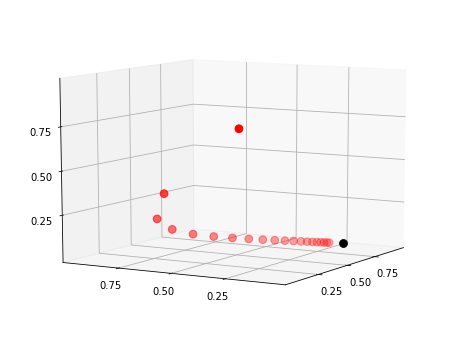

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

P = ((0.971, 0.029, 0.000),
    (0.145, 0.778, 0.077),
    (0.000, 0.508, 0.492))
P = np.array(P)                                            # create an array

psi = (0.0, 0.2, 0.8)                                      # set psi's value

fig = plt.figure(figsize=(8,6))                            # set figure size
ax = fig.add_subplot(111, projection='3d')                 


ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),              # set the size of all 3 dimensions and ticks for 3 axes
      xticks=(0.25, 0.5, 0.75),
      yticks=(0.25, 0.5, 0.75),
      zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(psi[0])                                  # append values to the end of an array
    y_vals.append(psi[1])
    z_vals.append(psi[2])
    psi = psi @ P
    
ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)            # A scatter plot of y vs x vs z with varying marker size  and color
ax.view_init(10, 210)                                      # set the angle of viewing the 3-D figure
 
mc = qe.MarkovChain(P)                                     # create markov chain from P
psi_star = mc.stationary_distributions[0]                  # find all stationary distributions of 0?
ax.scatter(psi_star[0], psi_star[1], psi_star[2], c='k', s=60) 

plt.show()

Here

$P$ is the stochastic matrix for recession and growth.

The highest red dot is an arbitrarily chosen initial probability distribution $\psi$, represented as a vector in $\R^3$.

The other red dots are the distributions $\psi P^t$ for $t=1,2,...$.

The black dot is $\psi^*$.



## 3.7 Ergodicity

Under irreducibility, yet another important result obtains:

For all $x \in S$,
$$
\frac{1}{m} \sum^m_{t=1} \bold{1} \{ X_t = x \} \to \psi^* (x) \ as \ m \to \infty
$$
Here

1. $\bold{1} \{ X_t = x \} =1 $ if $X_t =x$ and 0 otherwise.
2. Convergence is with probability 1.
3. The result does not depend on the distribution (or value) of $X_0$.

### Remark

1. It implies that the fraction of time the chain spends at state $x$ converges to $\psi^* (x)$ as time goes to infinity.

2. This gives us another way to interpret the staionary distribution, provided that the convergence result in $(16)$ exists:

   The convergence in $(16)$ is a special case of a law of large numbers result for Markov chains. (what is more?)

### Example

One interpretation of the notion of ergodicity: in the long run, cross-sectional averages for a population and time-series averages for a given person coincide.

## 3.8 Computing expectations

We are interested in computing unconditional expectations of the form
$$
\bold{E}[h(X_t)]
$$
and conditional expectations such as
$$
\bold{E}[h(X_{t+k}) | X_t = x]
$$
where

1. $\{ X_t \}$ is a Markov chain generated by $n \times n $ stochastic matrix $P$.

2. $h$ is a given function, which, in expressions involving matrix algebra, we will think of it as the column vector
   $$
   h = 
   \begin{pmatrix}
   h(x_1) \\
   \vdots \\
   h(x_n)
   \end{pmatrix}
   $$

### Computing unconditional expectation

The unconditional expectation $(17)$ is easy to compute: we just sum over the distribution of $X_t$ to get
$$
\bold{E} [h(X_t)] = \sum_{x \in S} (\psi P^t) (x) h(x)
$$
Here $\psi$ is the distribution of $X_0$.

Since $\psi$ and hence $\psi P^t$ are row vectors, we can also write this as the form of vector operations:
$$
\bold{E}[h(X_t)] = \psi P^t h
$$

### Computing conditional expectation

For the conditional expectation $(18)$, we need to sum over the conditional distribution of $X_{t+k}$, given $X_t =x$.

We already know that this is $P^k (x, \cdot)$ (?), so
$$
\bold{E}[h(X_{t+k})| X_t = x] = (P^k h) (x)
$$
The vector $P^k h$ stores the conditional expectation $\bold{E}[h(X_{t+k})|X_t = x]$ over all $x$.

### Expectations of geometric sums

Sometimes we also want to compute expectations of a geometric sum, such as $\sum_t \beta^t h(X)$.

By preceding discussion, this should be
$$
\bold{E}[\sum^{\infty}_{j=0} \beta^j h(X_{t+j})|X_t =x] = [(I - \beta P)^{-1}h](x)
$$
Where 
$$
(I- \beta P)^{-1} = I + \beta P + \beta^2 P^2 + \cdots
$$
Premultiplication by $(I- \beta P)^{-1}$ amounts to "applying the resolvent operator".

# Exercises 1 Simulating Markov Chains from Stochastic Matrix with different starting points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import MarkovChain

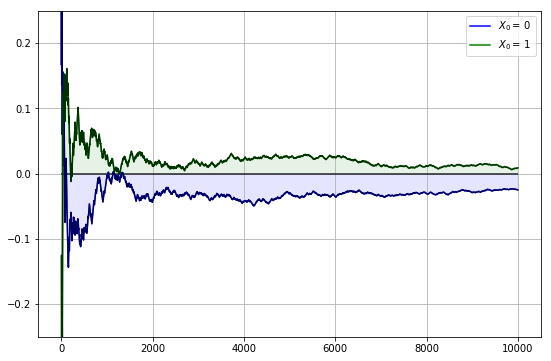

In [2]:
a = b = 0.1
N = 10000
p = b / (a + b)

# Create procedures to create Stochastic matrix P and generate Markov Chain, mc from P

P = ((1 - a,    a),
    (   b,  1 - b) )
P = np.array(P)
mc = MarkovChain(P)    

# Prepare the figure

fig, ax = plt.subplots(figsize = (9, 6)) # set figure size
ax.set_ylim(-0.25, 0.25)                 # set the range for vertical axis
ax.grid()                                # configure the grid lines
ax.hlines(0, 0, N, lw=2, alpha=0.6)      # plot horizontal lines at 0, from 0 to N

# Generate two simulated time series of 10000, starting at X_0=0 and X_0=1

for x0, col in ((0, 'blue'), (1, 'green')):
    X = mc.simulate(N, init=x0)                                               # generate X
    X_bar = (X == 0).cumsum() / (1+ np.arange(N, dtype = float ))             # generate X_bar
    
    ax.fill_between(range(N), np.zeros(N), X_bar - p, color=col, alpha=0.1)   # generate X_bar - p
    ax.plot(X_bar - p, color=col, label=f'$X_0 = \, {x0}$')                   # ?
    ax.plot(X_bar - p, 'k-', alpha=0.6)                                       # ?

ax.legend(loc='upper right')                                                  # Add the symbols on the upper right side
plt.show()

# Exercise 2 Search ranking system vs prices in certain competitive equilibria



In [26]:
import re


In [8]:
%%file web_graph_data.txt
a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;

Overwriting web_graph_data.txt


In [13]:
import numpy as np
from operator import itemgetter            #?

infile = 'web_graph_data.txt'              # input the file above
alphabet = 'abcdefghijklmnopqrstuvwxyz'    # ?

n = 14
Q = np.zeros((n, n), dtype=int)            # return a new array of given shape and type, filled with zeros (n by n matrix)
f = open(infile, 'r')                      
edges = f.readlines()                      # fileObject.readlines(sizehint): returns a list containing the lines; assign them to edges
f.close()                                  # close the open file
for edge in edges:                          
    from_node, to_node = re.findall('\w', edge)    # iterate over the lines of the file: return a list of all the matches in a single step
    i, j = alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j] = 1
P = np.empty((n, n))                      # return a new array of given shape and type, without initializing entries
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()     # Construct P(i, j)
mc = MarkovChain(P)
r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}

print('Rankings\n ***')                   # sorted(): return a sorted list of the specified iterable object
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print (f'{name}: {rank:.4}')

Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
e: 0.05312
i: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911
